In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_20002012 = pd.read_csv("C:\Guvi_projects\Resale_flat_datasets\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_19901999 = pd.read_csv("C:\Guvi_projects\Resale_flat_datasets\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_20152016 = pd.read_csv("C:\Guvi_projects\Resale_flat_datasets\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_20122014 = pd.read_csv("C:\Guvi_projects\Resale_flat_datasets\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_20172023 = pd.read_csv("C:\Guvi_projects\Resale_flat_datasets\Resaleflatprices2017.csv")

In [4]:
df = pd.concat([df_19901999, df_20002012, df_20122014, df_20152016, df_20172023], ignore_index=True)

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912986 entries, 0 to 912985
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                912986 non-null  object 
 1   town                 912986 non-null  object 
 2   flat_type            912986 non-null  object 
 3   block                912986 non-null  object 
 4   street_name          912986 non-null  object 
 5   storey_range         912986 non-null  object 
 6   floor_area_sqm       912986 non-null  float64
 7   flat_model           912986 non-null  object 
 8   lease_commence_date  912986 non-null  int64  
 9   resale_price         912986 non-null  float64
 10  remaining_lease      203936 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.6+ MB


In [8]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
df.drop("remaining_lease", axis = 1, inplace = True)

In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [11]:
for col in cat_cols:
    print(f'{col} - {len(df[col].unique())}')

month - 407
town - 27
flat_type - 8
block - 2695
street_name - 583
storey_range - 25
flat_model - 34


In [13]:
df.drop(["block", "street_name"], axis = 1, inplace = True)

In [14]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [16]:
df['year'] = df['month'].apply(lambda x: int(str(x)[:4]))
df['month'] = df['month'].apply(lambda x: int(str(x)[-2:]))

In [17]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [18]:
df["year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [19]:
df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [20]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

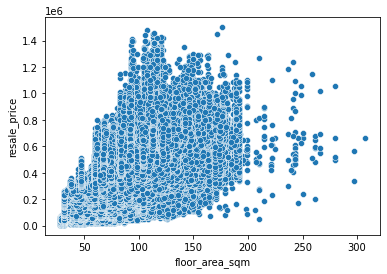

In [21]:
#Visualization
sns.scatterplot(data = df, x = "floor_area_sqm", y = "resale_price")

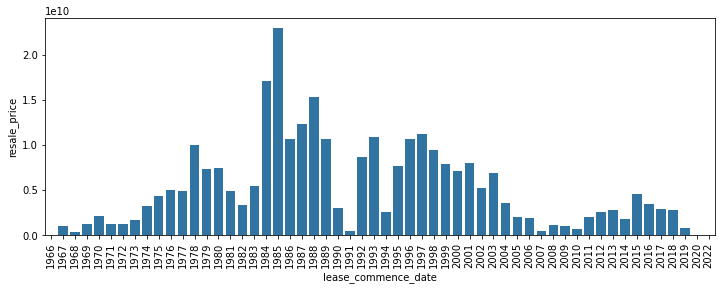

In [22]:
plt.figure(figsize=(12,4))
a = df.groupby('lease_commence_date')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

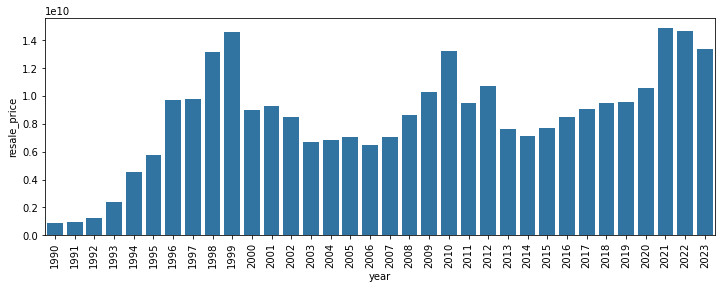

In [23]:
plt.figure(figsize=(12,4))
a = df.groupby('year')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

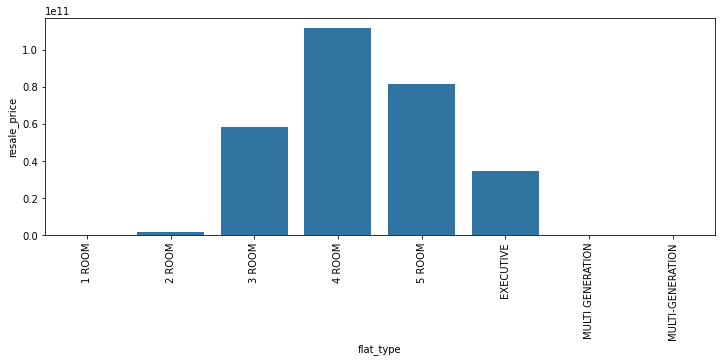

In [24]:
plt.figure(figsize=(12,4))
a = df.groupby('flat_type')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

In [25]:
# def line(col):
#     a = df.groupby(col)['resale_price'].mean()
#     a = pd.DataFrame(a)
#     sns.lineplot(data=a,x=a.index,y='resale_price')
#     plt.xticks(rotation=90)
#     plt.show()
# for col in ['flat_type', 'storey_range']:
#     line(col)

In [27]:
# sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='year'>

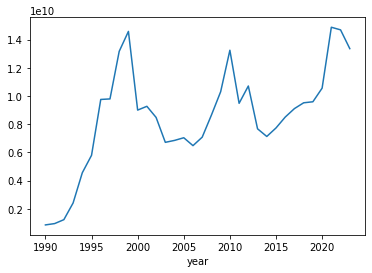

In [28]:
df.groupby('year').sum()['resale_price'].plot(kind='line')

<AxesSubplot:xlabel='lease_commence_date'>

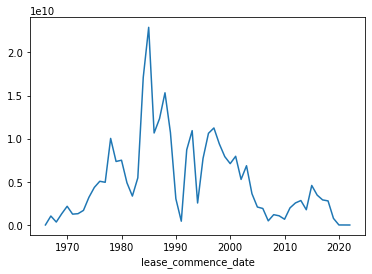

In [29]:
df.groupby('lease_commence_date').sum()['resale_price'].plot(kind='line')

In [30]:
#Model building
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [31]:
x = df.drop('resale_price',axis=1)
y = df['resale_price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
from sklearn.preprocessing import OneHotEncoder
town_ohe = OneHotEncoder()
flat_type_ohe = OneHotEncoder()
storey_range_ohe = OneHotEncoder()
flat_model_ohe = OneHotEncoder()

In [35]:
town = town_ohe.fit_transform(x_train[['town']]).toarray()
flat_type = flat_type_ohe.fit_transform(x_train[['flat_type']]).toarray()
storey_range = storey_range_ohe.fit_transform(x_train[['storey_range']]).toarray()
flat_model = flat_model_ohe.fit_transform(x_train[['flat_model']]).toarray()

In [36]:
x_train.drop(['town','flat_type','storey_range','flat_model'],axis=1,inplace=True)

In [37]:
x_train = np.concatenate([x_train.values,town,flat_type,storey_range,flat_model],axis=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [39]:
from sklearn.preprocessing import OneHotEncoder
town_ohe_test = OneHotEncoder(handle_unknown='ignore')
flat_type_ohe_test = OneHotEncoder(handle_unknown='ignore')
storey_range_ohe_test = OneHotEncoder(handle_unknown='ignore')
flat_model_ohe_test = OneHotEncoder(handle_unknown='ignore')

In [40]:
town = town_ohe_test.fit_transform(x_test[['town']]).toarray()
flat_type = flat_type_ohe_test.fit_transform(x_test[['flat_type']]).toarray()
storey_range = storey_range_ohe_test.fit_transform(x_test[['storey_range']]).toarray()
flat_model = flat_model_ohe_test.fit_transform(x_test[['flat_model']]).toarray()

In [41]:
x_test.drop(['town','flat_type','storey_range','flat_model'],axis=1,inplace=True)

In [42]:
x_test = np.concatenate([x_test.values,town,flat_type,storey_range,flat_model],axis=1)

In [43]:
x_train.shape

(639090, 97)

In [44]:
x_test.shape

(273896, 98)

In [45]:
import numpy as np

# Assuming x_train and x_test are your NumPy arrays
columns_train = set(x_train.dtype.names) if x_train.dtype.names else set(range(x_train.shape[1]))
columns_test = set(x_test.dtype.names) if x_test.dtype.names else set(range(x_test.shape[1]))

# Find the extra column in x_test
extra_column = columns_test - columns_train

# Print the extra column (if any)
if extra_column:
    print("Extra column in x_test:", extra_column)
else:
    print("No extra column found in x_test")

Extra column in x_test: {97}


In [46]:
# Assuming 97 is the index of the extra column
extra_column_values = np.zeros(x_train.shape[0])  # Replace 0 with an appropriate default value
x_train = np.insert(x_train, 97, extra_column_values, axis=1)

In [47]:
x_train.shape

(639090, 98)

In [48]:
#Linear regression Model
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
predictions = lr.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,predictions)

0.12060742284544612

In [54]:
pred = lr.predict(x_train)
r2_score(y_train,pred)

0.8569838466505233

In [55]:
#Desicion Tree Model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [56]:
r2_score(y_test,y_pred)

0.9192853825544571

In [57]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)/df['resale_price'].max()

0.018903388907424084

In [58]:
yt_pred = dt.predict(x_train)
r2_score(y_train,yt_pred)

0.9984399304185478

In [59]:
#Testing 

In [60]:
df.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'year'],
      dtype='object')

In [61]:
month = 7
town = 'JURONG EAST'
flat_type = '4 ROOM'
storey_range = '13 TO 15'
floor_area_sqm = 91.0
flat_model = 'Model A2'
lease_commence_date = 1998
year = 2014

In [62]:
town = town_ohe.transform([[town]]).toarray()
flat_type = flat_type_ohe.transform([[flat_type]]).toarray()
storey_range = storey_range_ohe.transform([[storey_range]]).toarray()
flat_model = flat_model_ohe.transform([[flat_model]]).toarray()

In [63]:
month = np.array([[month]])
floor_area_sqm = np.array([[floor_area_sqm]])
lease_commence_date = np.array([[lease_commence_date]])
year = np.array([[year]])

In [64]:
x = np.concatenate([month, floor_area_sqm, lease_commence_date, year,town, flat_type, storey_range, flat_model],axis=1)

In [65]:
x = scaler.transform(x)

In [66]:
x

array([[0.54545455, 0.22580645, 0.57142857, 0.72727273, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [74]:
# dt.predict(x)

In [77]:
df.iloc[701244]

month                            7
town                   JURONG EAST
flat_type                   4 ROOM
storey_range              13 TO 15
floor_area_sqm                91.0
flat_model                Model A2
lease_commence_date           1998
resale_price              495000.0
year                          2014
Name: 701244, dtype: object

In [78]:
import pickle

with open('Resale_flat_price.pkl','wb') as f:
    pickle.dump(dt,f)
with open('town_ohe.pkl','wb') as f:
    pickle.dump(town_ohe,f)
with open('flat_type_ohe.pkl','wb') as f:
    pickle.dump(flat_type_ohe,f)
with open('storey_range_ohe.pkl','wb') as f:
    pickle.dump(storey_range_ohe,f)
with open('flat_model_ohe.pkl','wb') as f:
    pickle.dump(flat_model_ohe,f)
with open('Resale_flat_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)